In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
attribution_scores = pd.read_csv("attribution_Scores/Fine-tuned_BERT/Twitter_sexism_1000_data_fine_tuned_bert_attribution_scores.csv")

In [3]:
attenion_weigths = pd.read_csv("attention_maps/bert_with_fine_tuning/attention_weights_for_1000_data.csv")

In [4]:
attribution_scores["abs_attribution"] = [np.absolute(i) for i in attribution_scores.attribution]

In [5]:
word_attribution_grp = attribution_scores.groupby(attribution_scores["words"])

In [6]:
import numpy as np

unique_words = []
avg_attribution = []
avg_abs_attribution = []
no_occurances = []
for name,grp in word_attribution_grp:
    unique_words.append(name)
    avg_attribution.append(np.mean(grp["attribution"]))
    avg_abs_attribution.append(np.mean(grp["abs_attribution"]))
    no_occurances.append(len(grp["attribution"]))

In [7]:
word_attribution_unique = {}
word_attribution_unique["unique_words"] = unique_words
word_attribution_unique["attribution"] = avg_attribution
word_attribution_unique["abs_attribution"] = avg_abs_attribution
word_attribution_unique["No_occurences"] = no_occurances

In [8]:
word_attribution_unique_df = pd.DataFrame.from_dict(word_attribution_unique)

In [9]:
len(word_attribution_unique_df)

3878

In [10]:
word_attribution_unique_df.head(5)

,unique_words,attribution,abs_attribution,No_occurences
0,!,-0.001853,0.009658,143
1,##0,-0.001012,0.001688,17
2,##00,-0.021957,0.021957,2
3,##1,-0.031018,0.031596,21
4,##10,0.025496,0.025498,2


In [11]:
attenion_weigths.head(5)

,word,attention_map
0,[CLS],{1: {1: 0.01951400376856327}}
1,[CLS],{1: {2: 0.03291776403784752}}
2,[CLS],{1: {3: 0.22955559194087982}}
3,[CLS],{1: {4: 0.04363783076405525}}
4,[CLS],{1: {5: 0.052084341645240784}}


In [12]:
len(attenion_weigths)

3250656

In [13]:
unique_words_attention = []

for g, i in attenion_weigths.groupby("word"):
    unique_words_attention.append(g)

In [14]:
len(unique_words_attention)

3880

In [15]:
unique_words_attention_common = [i for i in unique_words_attention if i in list(word_attribution_unique_df.unique_words.values)]


In [16]:
len(unique_words_attention_common)

3878

In [17]:
common_words_attention = attenion_weigths[attenion_weigths["word"].isin(unique_words_attention_common)]

In [18]:
len(common_words_attention)

2962368

In [19]:
def generate_attention_attention_layers_per_head_for_word(word,attention_map_df):
  import ast
  frames = []
  #len(attention_map_df[attention_map_df["word"]==word]["attention_map"].values)
  for i in attention_map_df[attention_map_df["word"]==word]["attention_map"].values:
    frames.append(pd.DataFrame.from_dict(ast.literal_eval(i)))
  res = pd.concat(frames)
  res = res.fillna(0)
  res = res.groupby(res.index).mean()
  return res

In [20]:
mean_attetnion_weigth_of_last_layers = []
for i in unique_words_attention_common:
    res = generate_attention_attention_layers_per_head_for_word(i,common_words_attention)
    avg_head_res_ft = res.mean(axis=1).values
    mean_attetnion_weigth_of_last_layers.append(np.mean(avg_head_res_ft[-4:]))

In [21]:
attribution_scores_common = word_attribution_unique_df[word_attribution_unique_df["unique_words"].isin(unique_words_attention_common)]

In [22]:
attribution_scores_common = attribution_scores_common.sort_values("unique_words")

In [23]:
attribution_scores_common_list = []
for i in unique_words_attention_common:
    index = unique_words_attention_common.index(i)
    attribution_scores_common = word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]
    attribution_scores_common["avg_attention_weigth_in_last_layers"] = mean_attetnion_weigth_of_last_layers[index]
    #attribution_scores_common["max_attention_weigth_in_last_layers"] = max_attetnion_weigth_of_last_layers[index]
    attribution_scores_common_list.append(attribution_scores_common)

/home/fatma/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
attribution_scores_common = pd.concat(attribution_scores_common_list)

In [25]:
len(attribution_scores_common)

3878

In [26]:
attribution_scores_common.head()

,unique_words,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
0,!,-0.001853,0.009658,143,0.002712
1,##0,-0.001012,0.001688,17,0.002668
2,##00,-0.021957,0.021957,2,0.003210
3,##1,-0.031018,0.031596,21,0.001945
4,##10,0.025496,0.025498,2,0.003783


In [27]:
subtokens = attribution_scores_common[attribution_scores_common.unique_words.str.contains("#")]

In [28]:
subtokens.head()

,unique_words,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
1,##0,-0.001012,0.001688,17,0.002668
2,##00,-0.021957,0.021957,2,0.003210
3,##1,-0.031018,0.031596,21,0.001945
4,##10,0.025496,0.025498,2,0.003783
5,##11,-0.025980,0.047907,3,0.003709


In [29]:
len(subtokens)

767

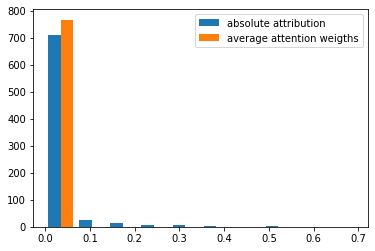

In [30]:
plt.hist([subtokens["abs_attribution"], subtokens["avg_attention_weigth_in_last_layers"]], label=["absolute attribution", "average attention weigths"])
plt.legend()

In [31]:
tokens = attribution_scores_common[~attribution_scores_common.unique_words.str.contains("#")]

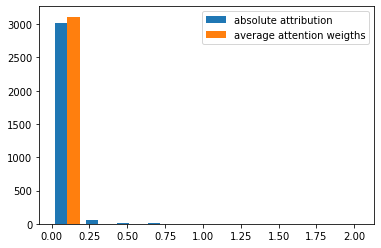

In [32]:
plt.hist([tokens["abs_attribution"], tokens["avg_attention_weigth_in_last_layers"]],label=["absolute attribution", "average attention weigths"])
plt.legend()

array([[<AxesSubplot:xlabel='attribution', ylabel='attribution'>,
        <AxesSubplot:xlabel='abs_attribution', ylabel='attribution'>,
        <AxesSubplot:xlabel='No_occurences', ylabel='attribution'>,
        <AxesSubplot:xlabel='avg_attention_weigth_in_last_layers', ylabel='attribution'>],
       [<AxesSubplot:xlabel='attribution', ylabel='abs_attribution'>,
        <AxesSubplot:xlabel='abs_attribution', ylabel='abs_attribution'>,
        <AxesSubplot:xlabel='No_occurences', ylabel='abs_attribution'>,
        <AxesSubplot:xlabel='avg_attention_weigth_in_last_layers', ylabel='abs_attribution'>],
       [<AxesSubplot:xlabel='attribution', ylabel='No_occurences'>,
        <AxesSubplot:xlabel='abs_attribution', ylabel='No_occurences'>,
        <AxesSubplot:xlabel='No_occurences', ylabel='No_occurences'>,
        <AxesSubplot:xlabel='avg_attention_weigth_in_last_layers', ylabel='No_occurences'>],
       [<AxesSubplot:xlabel='attribution', ylabel='avg_attention_weigth_in_last_layers'>,
 

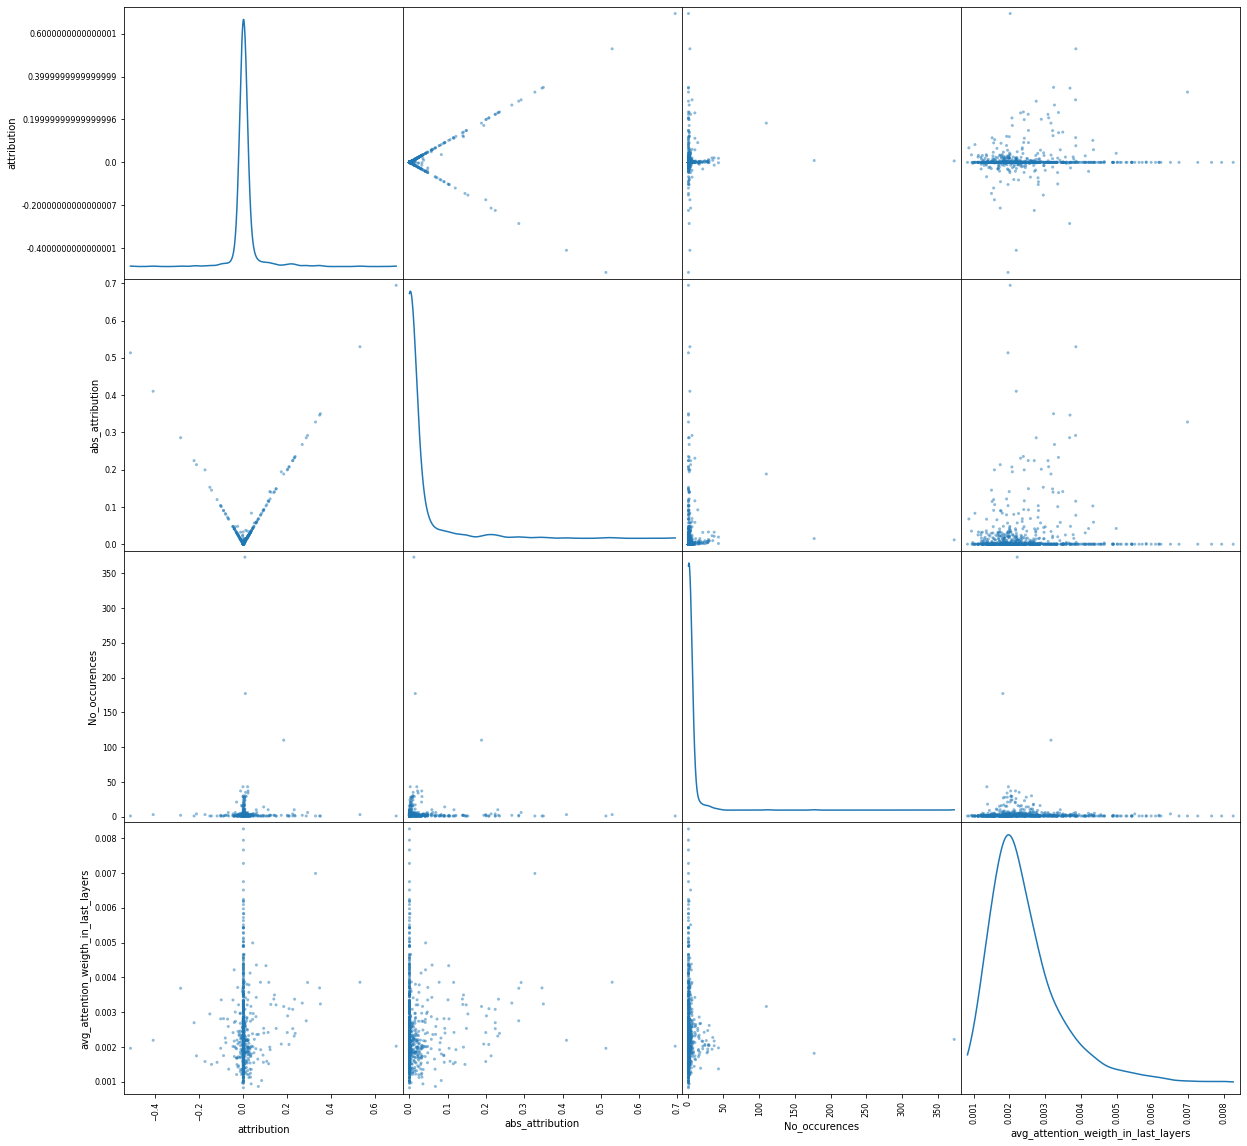

In [33]:
pd.plotting.scatter_matrix(subtokens, figsize=(20, 20),diagonal='kde')

In [34]:
len(attribution_scores_common)

3878

In [35]:
attribution_scores_common.corr()

,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
attribution,1.000000,0.137427,0.006992,0.118217
abs_attribution,0.137427,1.000000,-0.002028,0.108370
No_occurences,0.006992,-0.002028,1.000000,-0.047612
avg_attention_weigth_in_last_layers,0.118217,0.108370,-0.047612,1.000000


In [36]:
df = attribution_scores_common[["attribution", "abs_attribution" ,"No_occurences", "avg_attention_weigth_in_last_layers"]]

In [37]:
attribution_scores_common

,unique_words,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
0,!,-1.853414e-03,9.658228e-03,143,0.002712
1,##0,-1.012122e-03,1.687839e-03,17,0.002668
2,##00,-2.195727e-02,2.195727e-02,2,0.003210
3,##1,-3.101801e-02,3.159634e-02,21,0.001945
4,##10,2.549642e-02,2.549815e-02,2,0.003783
...,...,...,...,...,...
3873,zero,-5.170837e-07,9.701612e-07,2,0.002296
3874,zoe,-3.177177e-06,3.177177e-06,1,0.002569
3875,zone,1.481000e-01,1.481000e-01,1,0.007930
3876,zu,1.553298e-06,1.553298e-06,1,0.004976


In [38]:
df.corr()

,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
attribution,1.000000,0.137427,0.006992,0.118217
abs_attribution,0.137427,1.000000,-0.002028,0.108370
No_occurences,0.006992,-0.002028,1.000000,-0.047612
avg_attention_weigth_in_last_layers,0.118217,0.108370,-0.047612,1.000000


Text(0, 0.5, 'Average attention weigth \n in the last 4 layers')

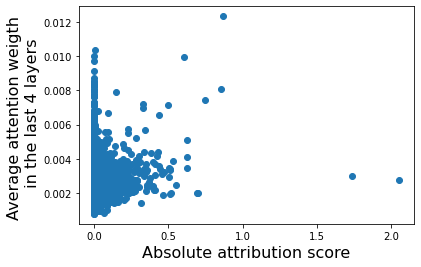

In [39]:
plt.scatter(attribution_scores_common["abs_attribution"], attribution_scores_common["avg_attention_weigth_in_last_layers"])
plt.xlabel("Absolute attribution score",fontsize=16)
plt.ylabel("Average attention weigth \n in the last 4 layers",fontsize=16)


In [40]:
attribution_scores_common[attribution_scores_common["avg_attention_weigth_in_last_layers"]>5]

,unique_words,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers


In [41]:
attribution_scores_common[attribution_scores_common["abs_attribution"]>0.5]

,unique_words,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
154,##cott,-0.513327,0.513327,1,0.001960
267,##heart,0.694317,0.694317,1,0.002020
424,##mbo,0.529660,0.529660,3,0.003858
1013,atrocities,-2.052435,2.052435,1,0.002760
1201,bully,-0.505017,0.505017,2,0.003492
1444,corporate,0.500310,0.500310,1,0.002967
1572,dignity,0.548697,0.548697,1,0.002456
1595,divorce,-0.697110,0.697110,1,0.001992
1813,feminism,0.625263,0.625263,12,0.005117
1814,feminist,0.624195,0.624195,10,0.004095


In [42]:
attribution_scores_common[attribution_scores_common["No_occurences"] == np.max(attribution_scores_common["No_occurences"] )]

,unique_words,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
777,.,0.006269,0.013432,1216,0.002444


Text(0, 0.5, 'Average attention weigth \n in the last 4 layers')

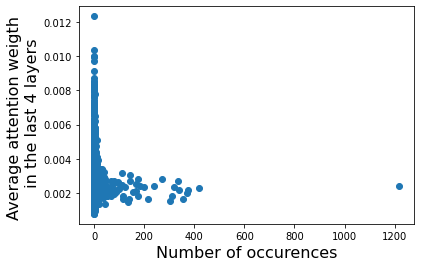

In [43]:
plt.scatter(attribution_scores_common["No_occurences"], attribution_scores_common["avg_attention_weigth_in_last_layers"])
plt.xlabel("Number of occurences",fontsize=16)
plt.ylabel("Average attention weigth \n in the last 4 layers",fontsize=16)

array([[<AxesSubplot:xlabel='attribution', ylabel='attribution'>,
        <AxesSubplot:xlabel='abs_attribution', ylabel='attribution'>,
        <AxesSubplot:xlabel='No_occurences', ylabel='attribution'>,
        <AxesSubplot:xlabel='avg_attention_weigth_in_last_layers', ylabel='attribution'>,
        <AxesSubplot:xlabel='max_attention_weigth_in_last_layers', ylabel='attribution'>],
       [<AxesSubplot:xlabel='attribution', ylabel='abs_attribution'>,
        <AxesSubplot:xlabel='abs_attribution', ylabel='abs_attribution'>,
        <AxesSubplot:xlabel='No_occurences', ylabel='abs_attribution'>,
        <AxesSubplot:xlabel='avg_attention_weigth_in_last_layers', ylabel='abs_attribution'>,
        <AxesSubplot:xlabel='max_attention_weigth_in_last_layers', ylabel='abs_attribution'>],
       [<AxesSubplot:xlabel='attribution', ylabel='No_occurences'>,
        <AxesSubplot:xlabel='abs_attribution', ylabel='No_occurences'>,
        <AxesSubplot:xlabel='No_occurences', ylabel='No_occurences'>,


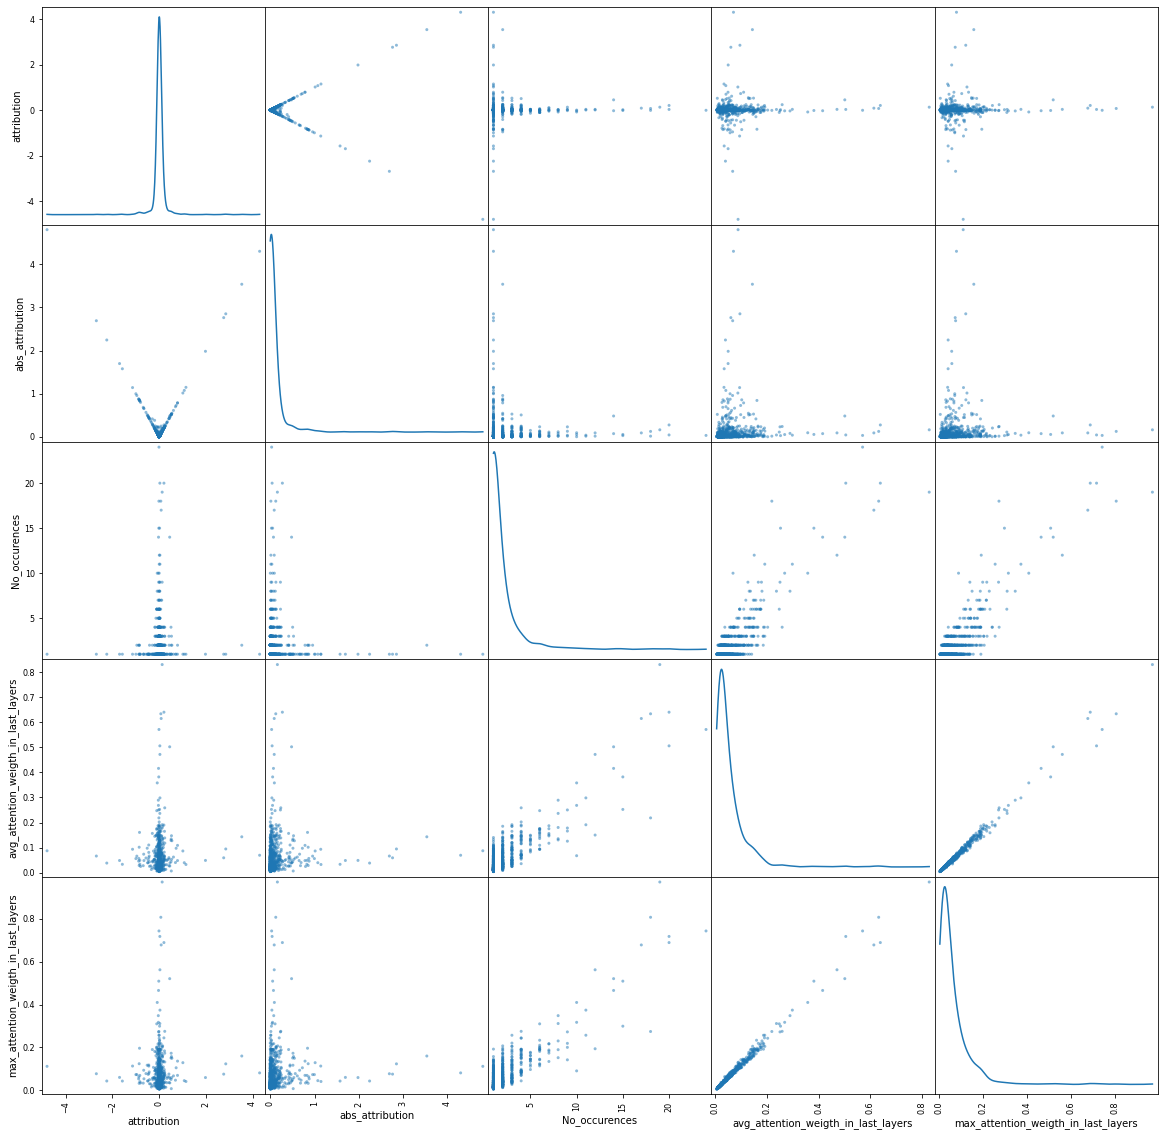

In [54]:
pd.plotting.scatter_matrix(df, figsize=(20, 20),diagonal='kde')

In [82]:
abs_attribution_correlation = np.correlate(attribution_scores_common["abs_attribution"],attribution_scores_common["abs_attribution"])

In [83]:
attention_weigths_correlation = np.correlate(attribution_scores_common["avg_attention_weigth_in last layers"],attribution_scores_common["avg_attention_weigth_in last layers"])

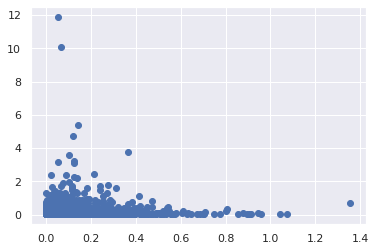

In [93]:
plt.scatter(attribution_scores_common["abs_attribution"],\
           attribution_scores_common["avg_attention_weigth_in last layers"])

In [94]:
np.corrcoef(attribution_scores_common["abs_attribution"],\
           attribution_scores_common["avg_attention_weigth_in last layers"])

array([[ 1.        , -0.00144164],
       [-0.00144164,  1.        ]])

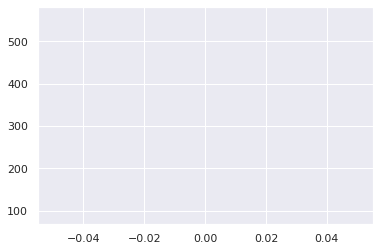

In [84]:
plt.plot(abs_attribution_correlation)
plt.plot(attention_weigths_correlation)

In [81]:
len(abs_attribution_avg_attention_weigths)

6761

In [90]:
attribution_avg_attention_weigths = np.correlate(attribution_scores_common["abs_attribution"],attribution_scores_common["avg_attention_weigth_in last layers"],"same")

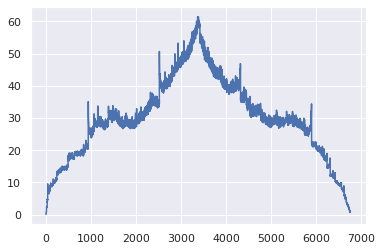

In [91]:
plt.plot(abs_attribution_avg_attention_weigths)

In [78]:
attribution_avg_attention_weigths = np.correlate(attribution_scores_common["attribution"],attribution_scores_common["avg_attention_weigth_in last layers"],"full")

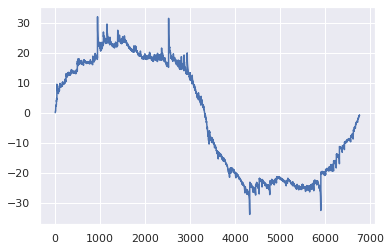

In [79]:
plt.plot(attribution_avg_attention_weigths)